<p style="text-align:left"><span style="font-size:30px">基于评分卡的贷前用户信用风险预测</span></p>

<p><span style="font-size:20px">一、问题概述</span></p>

评分卡，一般是指用于小贷用户质量评分的评分卡表，它是以分数形式衡量用户信用风险大小的手段，衡量贷款人可能给金融机构带来经济损失的可能性。一般来说，评分卡分数越高，用户信用越好，风险越小。对于个人用户来说，评分卡分为四类：A卡、B卡、C卡和F卡。A卡（Application Scorecard）被称为申请评分卡或者申请者评级模型，用来帮助金融机构来判断是否应该借钱给一个新用户。如果某一个人风险太高，我们就可以拒绝贷款。B卡(Behavior Scorecard）和C卡（Collection Scorecard）分别用于评估借贷过程中用户行为和逾期的风险，F卡（Fraud Scorecard)则用于申请阶段对欺诈用户的识别。

评分卡的原理就是利用历史客户数据，分析出有效的特征，并将连续特征离散化（即分箱）。然后使用逻辑回归模型确定每个特征的权重和基础阈值，最后根据阈值，权重确定基础分数和每个分箱的分数。本文中基于A卡建立逻辑回归模型进行贷前用户的信用风险预测，以帮助金融机构评估是否要批准贷款。

通过评分卡进行贷前用户信用风险评估，不仅可以减少人工审核量，也可以提高放贷质量，是中小型金融机构必备的模型。



<p><span style="font-size:20px">二、项目目标</span></p>

本文以Kaggle上的借贷数据（数据来源：<a href="https://www.kaggle.com/competitions/GiveMeSomeCredit/data">Kaggle - Give Me Some Credit</a>）为例，分别进行数据清洗、EDA（探索性数据分析）、特征工程（包括数据分箱和特征选取）、逻辑回归建模、评分卡转换五个步骤，构建完整的评分卡模型，并生成可供生产部署的分组逻辑和评分阈值。

<p><span style="font-size:20px">三、理解数据</span></p>

Give Me Some Credit数据包含四个部分：cs-training.csv、cs-test.csv、sampleEntry.csv、Data Dictionary.xls。其中cs-training.csv为训练集，包含10个属性特征和1个结果特征SeriousDlqin2yrs，表示贷款人逾期与否。其余特征的含义和数据类型在Data Dictionary.xls作出具体解释，如下表所示。cs-test.csv和sampleEntry.csv为提交用的测试数据集。

在本文将仅使用cs-training.csv构建并验证模型效果。该训练集包括15w条借贷数据。

<table cellspacing="0" style="border-collapse:collapse; height:233px; width:794px">
	<tbody>
		<tr>
			<td style="background-color:#c0c0c0; border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><strong><span style="font-family:Arial">Variable&nbsp;Name</span></strong></span></span></td>
			<td style="background-color:#c0c0c0; border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><span style="font-size:13px"><span style="color:#000000"><strong><span style="font-family:Arial">Description</span></strong></span></span></td>
			<td style="background-color:#c0c0c0; border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><strong><span style="font-family:Arial">Type</span></strong></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><strong><span style="font-family:Arial">SeriousDlqin2yrs</span></strong></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><strong>逾期90天或更久</strong></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><strong><span style="font-family:Arial">Y/N</span></strong></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:24px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">RevolvingUtilizationOfUnsecuredLines</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:24px; text-align:center; vertical-align:top; white-space:normal; width:442px"><span style="color:#000000; font-family:Arial">信用卡和个人信用欠款总额（房产除外）和非分期债务（如车贷）之和除以信用额度之和</span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:24px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">percentage</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">age</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><span style="color:#000000; font-family:Arial">借款人年龄</span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">NumberOfTime30-59DaysPastDueNotWorse</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; vertical-align:bottom; width:442px">
			<p style="text-align:center"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">借款人逾期30-59天（但在过去两年中没有更长的逾期时长）的次数</span></span></span></p>
			</td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">DebtRatio</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; vertical-align:bottom; width:442px">
			<p style="text-align:center"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">每月债务支付、赡养费、生活费用之和除以每月总收入</span></span></span></p>
			</td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">percentage</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">MonthlyIncome</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><span style="color:#000000; font-family:Arial">每月收入</span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">real</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">NumberOfOpenCreditLinesAndLoans</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; vertical-align:bottom; width:442px">
			<p style="text-align:center"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">未结贷款数量（分期付款例如车贷或抵押贷款）和信用额度（如信用卡）</span></span></span></p>
			</td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">NumberOfTimes90DaysLate</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><span style="color:#000000; font-family:Arial">借款人逾期90天或更久的次数</span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">NumberRealEstateLoansOrLines</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; vertical-align:bottom; width:442px">
			<p style="text-align:center"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">抵押贷款和房产贷款的数量（包括房屋净值信贷额度）</span></span></span></p>
			</td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">NumberOfTime60-89DaysPastDueNotWorse</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">借款人逾期60-89天（但在过去两年中没有更长的逾期时长）的次数</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
		<tr>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:237px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">NumberOfDependents</span></span></span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:442px"><span style="color:#000000; font-family:Arial">家庭中的受抚养人数（例如配偶、子女等），不包括他们自己</span></td>
			<td style="border-color:#000000; border-style:solid; border-width:0.7px; height:19px; text-align:center; vertical-align:bottom; width:112px"><span style="font-size:13px"><span style="color:#000000"><span style="font-family:Arial">integer</span></span></span></td>
		</tr>
	</tbody>
</table>


<p><span style="font-size:20px">四、数据清洗</span></p>

In [664]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

In [665]:
#导入数据
data = pd.read_csv("cs-training.csv",index_col=0)

In [666]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [667]:
data.shape

(150000, 11)

In [668]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [669]:
#检查重复值
data.duplicated().sum()

609

In [670]:
#过滤609条重复值
data.drop_duplicates(inplace=True)

In [671]:
#检查过滤效果
data.duplicated().sum()

0

In [672]:
#删除重复值后，需要重新恢复索引
data=data.reset_index()

In [673]:
#检查索引是否恢复
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   index                                 149391 non-null  int64  
 1   SeriousDlqin2yrs                      149391 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 3   age                                   149391 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 5   DebtRatio                             149391 non-null  float64
 6   MonthlyIncome                         120170 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 8   NumberOfTimes90DaysLate               149391 non-null  int64  
 9   NumberRealEstateLoansOrLines          149391 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 11  

In [674]:
#检查缺失值
#检查数据集中每一个特征的数据缺失情况
data.isnull().sum()

index                                       0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [675]:
#查看每个特征缺失值比例
data.isnull().sum()/data.shape[0]

index                                   0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

MonthlyIncome和NumberOfDependents分别存在19.56%和2.56%的缺失值。对于较小的缺失比例，可以通过删除或均值的方式填补，MonthlyIncome缺失比例较大，且收入特征对于信用评分影响较大，因此可以考虑用四分位数进行填补，将所有空白值视为低收入群体。原因是高收入对于申请贷款是有利的，如果是收入良好的用户，会倾向于写上自己的收入情况，因此未填写的很大可能性是低收入用户。（在实际业务中，可以通过和业务人员沟通完善数据）。

In [676]:
#用四分位数补全MonthlyIncome
per25=data.describe()['MonthlyIncome']['25%']
data['MonthlyIncome']=data['MonthlyIncome'].replace(np.nan,per25)

In [677]:
#用均值补全NumberOfDependents
me = int(data['NumberOfDependents'].mean())
data['NumberOfDependents'].fillna(me,inplace=True)

In [678]:
#检查每个特征缺失值比例
data.isnull().sum()/data.shape[0]

index                                   0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

<p><span style="font-size:20px">五、探索性数据分析</span></p>

In [679]:
colors=['#9FE2BF','#87CEEB']

[93.30013186872034, 6.699868131279663]


Text(0.5, 1.0, 'Number of Defaulted/Not Defaulted Users')

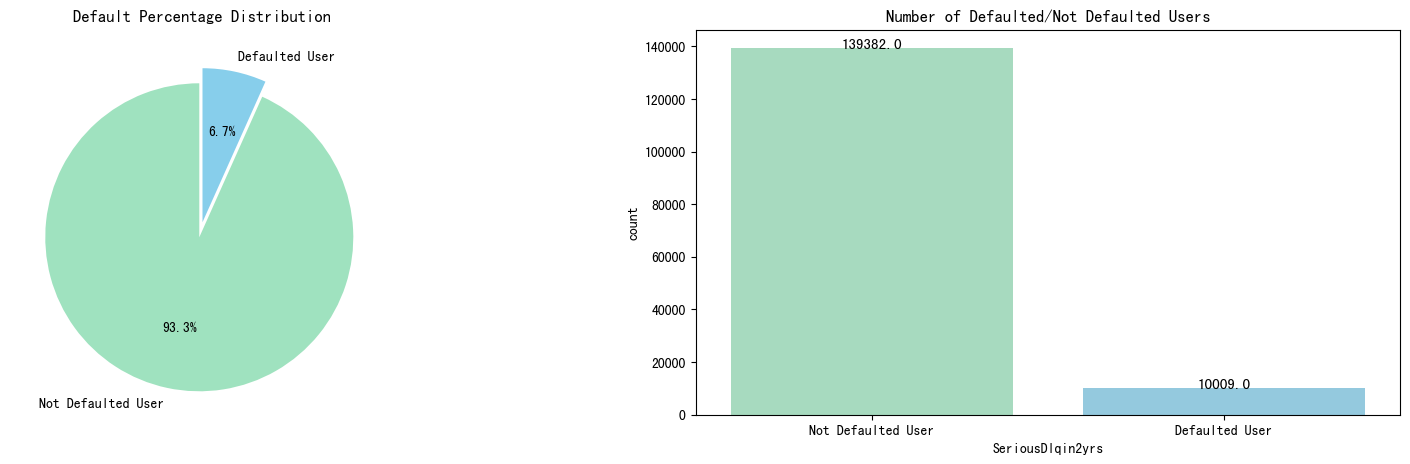

In [680]:
#首先，观测标签特征的分布
l=list(data['SeriousDlqin2yrs'].value_counts())
circle=[l[0]/sum(l)*100, l[1]/sum(l)*100]
print(circle)

fig=plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle, labels=['Not Defaulted User', 'Defaulted User'], autopct='%1.1f%%', startangle=90, explode=(0.1,0),colors=colors)
plt.title('Default Percentage Distribution')

plt.subplot(1,2,2)
ax=sns.countplot(x='SeriousDlqin2yrs', data=data, palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+2, rect.get_height(), horizontalalignment='center',fontsize=11)
ax.set_xticklabels(['Not Defaulted User','Defaulted User'])

plt.title('Number of Defaulted/Not Defaulted Users')

所有数据中，6%的用户发生违约，而未违约用户的占比为93.3%。可以发现，这是一个非常不平衡的数据集，会影响预测的结果。因此，在建模之前，需要对样本进行平衡。

In [681]:
#由于特征数目不多，依次观察每个特征的特点
#RevolvingUtilizationOfUnsecuredLines 
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<AxesSubplot: xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

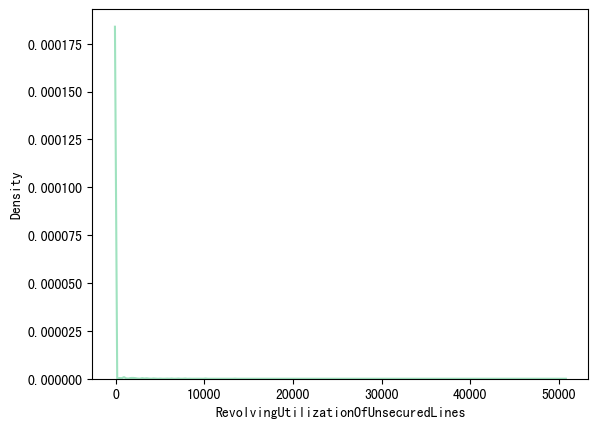

In [682]:
sns.kdeplot(data["RevolvingUtilizationOfUnsecuredLines"], color=colors[0])

<p>小结：</p>

<ul>
	<li>RevolvingUtilizationOfUnsecuredLines，即信用卡和个人信用欠款总额（房产除外）和非分期债务（如车贷）之和除以信用额度之和，根据经验判断，随着该值增加，违约人数比例也会上升</li>
	<li>该特征的分布是右偏的，最大值为50708，说明很多用户欠款已经超过信用额度，甚至超过5w多倍</li>
</ul>

In [683]:
#age
data['age'].describe()

count    149391.000000
mean         52.306237
std          14.725962
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<AxesSubplot: xlabel='age', ylabel='Density'>

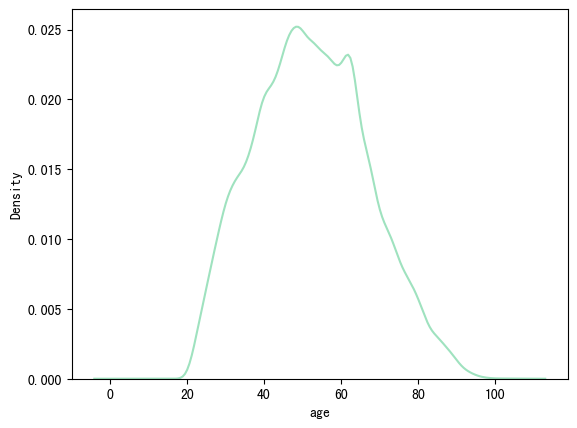

In [684]:
sns.kdeplot(data["age"], color=colors[0])

In [685]:
#查看年龄小于10岁和年龄大于100岁的有多少
(data['age']<10).sum()+(data['age']>100).sum()

14

In [686]:
#过滤异常年龄
data=data[data['age']>=10]
data=data[data['age']<=100]

In [687]:
data['age'].describe()

count    149377.000000
mean         52.302115
std          14.718202
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max          99.000000
Name: age, dtype: float64

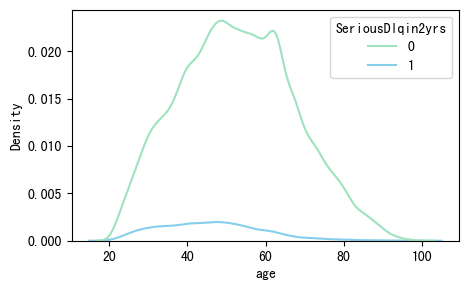

In [688]:
#分别查看违约和未违约的人群分布
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3))
for i in range(1):
    plt.subplot(1,1,i+1)
    ax = sns.kdeplot(x="age",data = data,hue = "SeriousDlqin2yrs",palette = colors)

<p>小结：</p>

<ul>
	<li>Age，即贷款人年龄，分布基本符合正态分布规律</li>
	<li>排除10岁以下和100岁以上的异常用户</li>
	<li>可以看出未违约人群远大于违约人群，且违约人群趋向于年轻化</li>
</ul>

In [689]:
#逾期指标，包括：
#NumberOfTime30-59DaysPastDueNotWorse
#NumberOfTime60-89DaysPastDueNotWorse
#NumberOfTimes90DaysLate
data[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,149377.000000,149377.000000,149377.000000
mean,0.393903,0.212523,0.238142
std,3.853130,3.810701,3.826343
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [690]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     125441
1      16032
2       4597
3       1754
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [691]:
#显然，98和96属于异常值，将这225个值全部过滤
data = data[data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']<90]

In [692]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     141817
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [693]:
data['NumberOfTimes90DaysLate'].value_counts()

0     141094
1       5232
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [694]:
#异常值不再存在，恢复索引
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149152 entries, 0 to 149151
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   level_0                               149152 non-null  int64  
 1   index                                 149152 non-null  int64  
 2   SeriousDlqin2yrs                      149152 non-null  int64  
 3   RevolvingUtilizationOfUnsecuredLines  149152 non-null  float64
 4   age                                   149152 non-null  int64  
 5   NumberOfTime30-59DaysPastDueNotWorse  149152 non-null  int64  
 6   DebtRatio                             149152 non-null  float64
 7   MonthlyIncome                         149152 non-null  float64
 8   NumberOfOpenCreditLinesAndLoans       149152 non-null  int64  
 9   NumberOfTimes90DaysLate               149152 non-null  int64  
 10  NumberRealEstateLoansOrLines          149152 non-null  int64  
 11  

In [695]:
data[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,149152.000000,149152.000000,149152.000000
mean,0.246728,0.065075,0.090733
std,0.698948,0.330688,0.486374
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,13.000000,11.000000,17.000000


<p>小结：</p>

<ul>
	<li>这三个指标用于衡量用户逾期分别为30-59、60-89、90天以上的次数</li>
	<li>逾期的次数通常不超过20次</li>
	<li>逾期次数越多，显然违约人数的比例会上升</li>
</ul>


In [696]:
#DebtRatio
data['DebtRatio'].describe()

count    149152.000000
mean        354.959256
std        2043.422532
min           0.000000
25%           0.178222
50%           0.368618
75%           0.876886
max      329664.000000
Name: DebtRatio, dtype: float64

<AxesSubplot: xlabel='DebtRatio', ylabel='Density'>

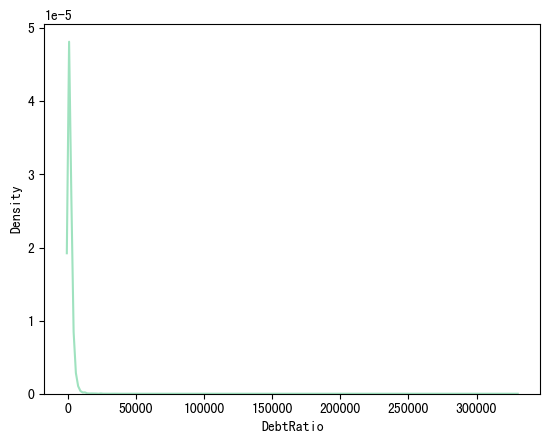

In [697]:
sns.kdeplot(data["DebtRatio"], color=colors[0])

<p>小结：</p>

<ul>
	<li>Dept Ratio，即每月债务支付、赡养费、生活费用之和除以每月总收入（负债率），根据经验判断，随着该值增加，违约人数比例也会上升</li>
	<li>该特征的分布是右偏的，和RevolvingUtilizationOfUnsecuredLines类似，最大值为329664，说明很多用户负债已经已经远远超过收入，甚至超过32w多倍</li>
</ul>


In [698]:
#MonthlyIncome
data['MonthlyIncome'].describe()

count    1.491520e+05
mean     6.039509e+03
std      1.298047e+04
min      0.000000e+00
25%      3.400000e+03
50%      4.400000e+03
75%      7.412000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

<AxesSubplot: xlabel='MonthlyIncome', ylabel='Density'>

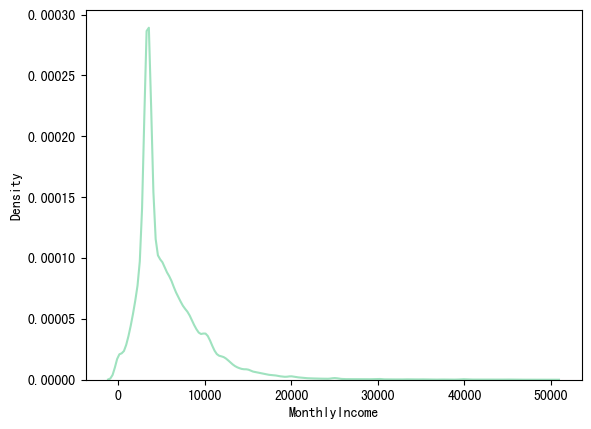

In [699]:
sns.kdeplot(data[data['MonthlyIncome']<50000]['MonthlyIncome'], color=colors[0])

<p>小结：</p>

<ul>
	<li>MonthlyIncome，即每月收入，平均值为6040，根据经验，收入越高，违约人群的比例应越低</li>
	<li>该特征基本符合正态分布，同时收入的分布体现了二八定律：80%的财富集中在20%的手中</li>
</ul>


In [700]:
#贷款数量指标，包括：
#NumberOfOpenCreditLinesAndLoans
#NumberRealEstateLoansOrLines
data[['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines']].describe()


,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
count,149152.000000,149152.000000
mean,8.493839,1.023989
std,5.129888,1.130366
min,0.000000,0.000000
25%,5.000000,0.000000
50%,8.000000,1.000000
75%,11.000000,2.000000
max,58.000000,54.000000


<AxesSubplot: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='count'>

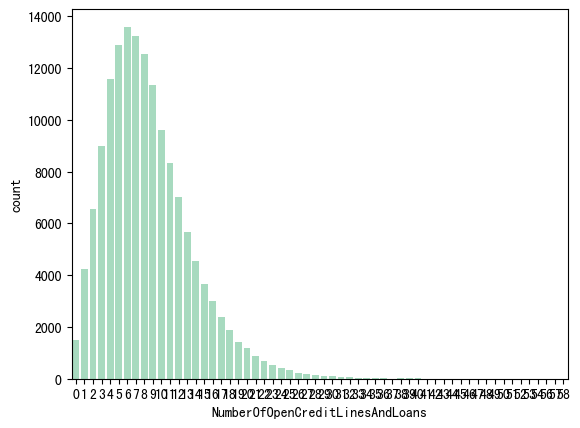

In [701]:
sns.countplot(x="NumberOfOpenCreditLinesAndLoans",data=data, color=colors[0])

<AxesSubplot: xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

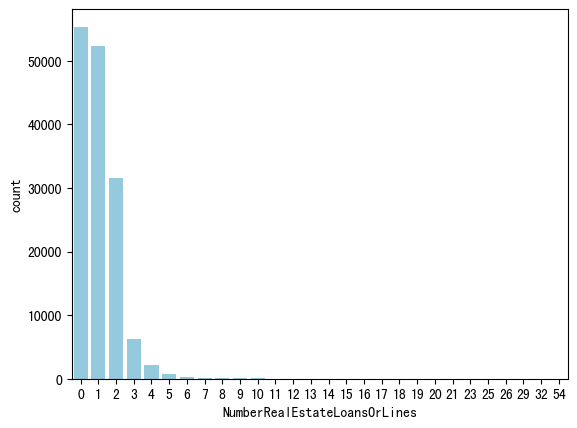

In [702]:
sns.countplot(x="NumberRealEstateLoansOrLines",data=data, color=colors[1])

<p>小结：</p>

<ul>
	<li>NumberOfOpenCreditLinesAndLoans和NumberRealEstateLoansOrLines衡量的是未结贷款数量，通常数量越多，违约人群的比例越大</li>
	<li>NumberOfOpenCreditLinesAndLoans的数目平均要大于NumberRealEstateLoansOrLines，这可能与贷款规模有关，小额贷款的持有比例更多</li>
	<li>NumberOfOpenCreditLinesAndLoans基本呈正态分布，可以看出目前小额贷款或信用卡消费越来越普及</li>
	<li>NumberRealEstateLoansOrLines分布不太均匀，房贷持有比例还是较低的</li>
</ul>

In [703]:
#NumberOfDependents
data['NumberOfDependents'].describe()

count    149152.000000
mean          0.740969
std           1.108563
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

<AxesSubplot: xlabel='NumberOfDependents', ylabel='count'>

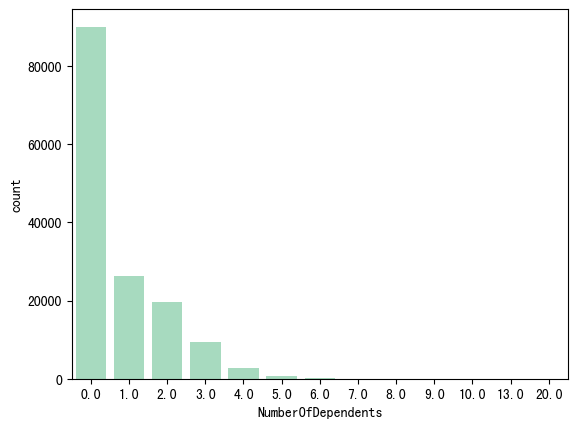

In [704]:
sns.countplot(x="NumberOfDependents",data=data, color=colors[0])

In [705]:
data['NumberOfDependents'].value_counts()

0.0     90033
1.0     26290
2.0     19500
3.0      9479
4.0      2860
5.0       745
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

<p>小结：</p>

<ul>
	<li>NumberOfDependents，即家庭人数，根据常识推断，家庭人数越多，违约比例越低</li>
	<li>家庭人数也是呈右偏分布的，最大家庭人数有20人，然而占据最大群体的是独身人群</li>
</ul>

<p><span style="font-size:20px">六、特征工程</span></p>

在这一部分，将会对样本数据进行分箱，并通过IV值选取典型特征，再结合badrate法查看并调整分箱。

<p><span style="font-size:18px">（一）数据分箱</span></p>

评分卡最重要的步骤就是数据分箱。分箱的本质就是将连续特征离散化，好让拥有不同属性的用户被分成不同的类别，并且可以避免连续型特征的取值过于稀疏而影响模型学习效果。

分箱最传统的方法是badrate分析法，它的原理是先对x进行分组，然后分析每组x的badrate（违约人群的比例）是否有固定趋势来确定y是否与x相关，并通过调整分组逻辑，使x分组后与y的关系更加稳定。通常分箱后，badrate应随着箱的取值大小而单调变化。badrate的分组逻辑必须具有强业务性，因此通常训练后的模型更贴近业务，但是需要大量的人力和时间。

另一种方法就是自动分箱，又分为无监督分箱和有监督分箱。无监督分箱中最常用的是等频分箱和等距分箱，分别是令每箱的样本数相等和每箱的宽度相等。有监督分箱常用的有卡方分箱、决策树分箱、Best-KS分箱。

分箱的数目，不宜太多，最好不超过10个，也不宜太少，4～5个最佳，因为箱子越少，损失的信息越多，银行业通过IV来衡量特征的信息量以及特征对预测函数的贡献，详情将在下一节介绍

在实际运用中，常常将传统和自动的方法相结合。例如通过自动分箱和IV值筛选特征，并查看所有特征的badrate，筛选掉完全经不住业务考验的特征。

本文将基于决策树算法对数据分箱，具体步骤如下：

<ol>
	<li>利用sklearn决策树，DecisionTreeClassifier的.tree_属性获得决策树的节点划分值</li>
	<li>基于上述得到的划分值，利用pandas.cut函数对特征进行分箱</li>
	<li>计算各个分箱的WOE、IV值以及badrate趋势</li>
</ol>

In [706]:
#函数定义
from sklearn.tree import DecisionTreeClassifier
def optimal_binning_boundary(x: pd.Series, y: pd.Series, nan: float = -999.) -> list:
    '''
        利用决策树获得最优分箱的边界值列表
    '''
    boundary = []  # 待return的分箱边界值列表
    
    x = x.values  
    y = y.values
    
    clf = DecisionTreeClassifier(criterion='entropy',    #“信息熵”最小化准则划分
                                 max_leaf_nodes=6,       # 最大叶子节点数
                                 min_samples_leaf=0.05)  # 叶子节点样本数量最小占比

    clf.fit(x.reshape(-1, 1), y)  # 训练决策树
    
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold
    
    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  # 获得决策树节点上的划分边界值
            boundary.append(threshold[i])

    boundary.sort()

    min_x = x.min()
    max_x = x.max() + 0.1  # +0.1是为了考虑后续groupby操作时，能包含特征最大值的样本
    boundary = [min_x] + boundary + [max_x]

    return boundary

In [707]:
#1. 利用sklearn决策树，DecisionTreeClassifier的.tree_属性获得决策树的节点划分值
col=list(data.columns)
col=col[3::]
boundarys={}
for i in col:
    boundary=optimal_binning_boundary(x=data[i],y=data['SeriousDlqin2yrs'])
    boundarys[i]=boundary
print(boundarys)


{'RevolvingUtilizationOfUnsecuredLines': [0.0, 0.11458224803209305, 0.21776090562343597, 0.49497613310813904, 0.6981423199176788, 0.8596274554729462, 50708.1], 'age': [21, 35.5, 42.5, 53.5, 56.5, 63.5, 99.1], 'NumberOfTime30-59DaysPastDueNotWorse': [0, 0.5, 1.5, 13.1], 'DebtRatio': [0.0, 0.01921968162059784, 0.1367916464805603, 0.42332078516483307, 0.6536748111248016, 3.9728435277938843, 329664.1], 'MonthlyIncome': [0.0, 1508.5, 3332.5, 3404.5, 4833.5, 6643.5, 3008750.1], 'NumberOfOpenCreditLinesAndLoans': [0, 2.5, 3.5, 5.5, 8.5, 13.5, 58.1], 'NumberOfTimes90DaysLate': [0, 0.5, 17.1], 'NumberRealEstateLoansOrLines': [0, 0.5, 1.5, 2.5, 54.1], 'NumberOfTime60-89DaysPastDueNotWorse': [0, 11.1], 'NumberOfDependents': [0.0, 0.5, 1.5, 2.5, 20.1]}


由于NumberOfTime30-59DaysPastDueNotWorse（3个）、NumberOfTime60-89DaysPastDueNotWorse（1个）、NumberOfTimes90DaysLate（2个）的箱数太少，因此通过观察特征badrate趋势进行手动分箱

In [708]:
def badrate(x: pd.Series, y: pd.Series, b: list, nan: float = -999.) -> pd.DataFrame:
    '''
        计算手动分箱的badrate，返回一个DataFrame
    '''
    boundary = b        # 获得手动分箱边界值
    df = pd.concat([x, y], axis=1)                        # 合并x、y为一个DataFrame，方便后续计算
    df.columns = ['x', 'y']                               # 特征变量、目标变量字段的重命名
    df['bins'] = pd.cut(x=x, bins=boundary, right=False)  # 获得每个x值所在的分箱区间
    
    grouped = df.groupby('bins')['y']                     # 统计各分箱区间的好、坏、总客户数量
    result_df = grouped.agg([('good',  lambda y: (y == 0).sum()), 
                             ('bad',   lambda y: (y == 1).sum()),
                             ('total', 'count')])
    result_df['bad_rate'] = result_df['bad'] / result_df['total']             # 坏比率
    
#     result_df['binning']=grouped.size().index
#     print(grouped.size().index)
    
    print(result_df)

In [709]:
#首先粗略分箱，试探变量的badrate趋势
#NumberOfTime30-59DaysPastDueNotWorse
bound1=[0,1,2,6,13]
badrate(x=data['NumberOfTime30-59DaysPastDueNotWorse'], 
               y=data['SeriousDlqin2yrs'],b=bound1)

           good   bad   total  bad_rate
bins                                   
[0, 1)   120406  5035  125441  0.040138
[1, 2)    13623  2409   16032  0.150262
[2, 6)     5132  2308    7440  0.310215
[6, 13)     119   119     238  0.500000


In [710]:
#NumberOfTime60-89DaysPastDueNotWorse
bound2=[0,1,2,6,11]
badrate(x=data['NumberOfTime60-89DaysPastDueNotWorse'], 
               y=data['SeriousDlqin2yrs'],b=bound2)

           good   bad   total  bad_rate
bins                                   
[0, 1)   134568  7249  141817  0.051115
[1, 2)     3954  1777    5731  0.310068
[2, 6)      748   827    1575  0.525079
[6, 11)      10    18      28  0.642857


In [711]:
#NumberOfTimes90DaysLate
bound3=[0,1,2,4,17]
badrate(x=data['NumberOfTimes90DaysLate'], 
               y=data['SeriousDlqin2yrs'],b=bound3)

           good   bad   total  bad_rate
bins                                   
[0, 1)   134546  6548  141094  0.046409
[1, 2)     3468  1764    5232  0.337156
[2, 4)     1061  1161    2222  0.522502
[4, 17)     205   398     603  0.660033


In [712]:
#将自动分箱结果替换为手动分箱结果
boundarys['NumberOfTime30-59DaysPastDueNotWorse']=bound1
boundarys['NumberOfTime60-89DaysPastDueNotWorse']=bound2
boundarys['NumberOfTimes90DaysLate']=bound3

<p><span style="font-size:18px">（二）特征选取</span></p>

将特征分箱的边界确认后，就可以计算IV值以筛选特征。在了解IV值之前，首先了解WOE的含义。

WOE的全称是Weight of Evidence，即证据权重，它是银行业用来衡量违约概率的指标，通常要在特征分箱处理后才能进行WOE编码，对于特征X第i箱的WOE值，其公式如下：

$$WOE_{i}=ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}=ln\frac{Bad_{X=X_i}/Good_{X=X_i}}{Bad_{total}/Good_{total}}$$

其中$Bad_{total}$代表坏样本总数（即违约样本），$Good_{total}$代表好样本总数，$Bad_{X=X_i}$代表第i箱的坏样本总数，$Good_{X=X_i}$代表第i箱的好样本总数。按照特征WOE映射表，就可以把特征的组别映射成对应的WOE值。

可以发现，WOE表示的实际上是“当前分箱中坏客户和好客户比值”和“所有样本中坏客户和好客户比值”的差异，显然，WOE越大，这种差异越大，坏客户的可能性越大，该分箱内的样本违约的可能性越大。

有了WOE的基本概念，接下来进一步了解IV。IV的全称是Information Value，即信息价值。通常在用逻辑回归模型时，需要对自变量进行筛选，即挑选出“入模特征”，需要考虑的一个最主要因素就是“特征的预测能力”。IV就是这样一种指标，类似的指标还有信息增益、基尼系数等。和WOE一样，每个分箱i会有一个对应的IV值，其公式如下：

$$IV_i=(\frac{Bad_{X=X_i}}{Bad_{total}}-\frac{Good_{X=X_i}}{Good_{total}})*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}=(\frac{Bad_{X=X_i}}{Bad_{total}}-\frac{Good_{X=X_i}}{Good_{total}})*WOE_i$$

将特征各分箱的IV值相加，就可以计算整个特征的IV值：

$$IV=\sum_{i}^nIV_i$$

信息论中，评估两个分布的距离（差异）可以用KL散度，又称为相对熵，对于分布P(x)和分布Q(x)，其Q对P的散度为：

$$D_{KL}(P||Q)=\sum_{x\in{X}}P(x)*ln\frac{P(x)}{Q(x)}$$

事实上，IV的意义就是违约用户（坏客户）与未违约客户（好客户）的距离/散度，令$G=\frac{Good_{X=X_i}}{Good_{total}}$代表每个分箱好客户的分布，$B=\frac{Bad_{X=X_i}}{Bad_{total}}$ 代表每个分箱坏客户的分布，则好客户相对坏客户的KL散度为：

$$D_{KL}(B||G)=\sum_{i}\frac{Bad_{X=X_i}}{Bad_{total}}*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}$$

坏客户相对好客户的KL散度为：

$$D_{KL}(G||B)=\sum_{i}\frac{Good_{X=X_i}}{Good_{total}}*ln\frac{Good_{X=X_i}/Good_{total}}{Bad_{X=X_i}/Bad_{total}}$$

二者之和即信息量IV：

$$IV=D_{KL}(B||G)+D_{KL}(G||B)\\
=\sum_{i}\frac{Bad_{X=X_i}}{Bad_{total}}*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}+\sum_{i}\frac{Good_{X=X_i}}{Good_{total}}*ln\frac{Good_{X=X_i}/Good_{total}}{Bad_{X=X_i}/Bad_{total}}\\
=\sum_{i}\frac{Bad_{X=X_i}}{Bad_{total}}*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}+\sum_{i}\frac{Good_{X=X_i}}{Good_{total}}*ln(\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}})^{-1}\\
=\sum_{i}\frac{Bad_{X=X_i}}{Bad_{total}}*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}-\sum_{i}\frac{Good_{X=X_i}}{Good_{total}}*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}\\
=\sum_{i}(\frac{Bad_{X=X_i}}{Bad_{total}}-\frac{Good_{X=X_i}}{Good_{total}})*ln\frac{Bad_{X=X_i}/Bad_{total}}{Good_{X=X_i}/Good_{total}}
$$

IV值越高，说明分布的区分度越高，也就是特征X对区分目标y的作用越大，即特征的价值越高。通常：

<ul>
	<li>IV&lt;0.02：几乎没有区分度</li>
	<li>0.02&lt;=IV&lt;0.1：有微弱的区分度</li>
	<li>0.1&lt;=IV&lt;0.3：有明显的区分度</li>
	<li>IV&gt;=0.3：较强区分度</li>
</ul>





In [713]:
def feature_woe_iv(x: pd.Series, y: pd.Series, b: list, nan: float = -999.) -> pd.DataFrame:
    '''
        计算变量各个分箱的WOE、IV值，返回一个DataFrame
    '''
    boundary = b        # 获得最优分箱边界值列表
    df = pd.concat([x, y], axis=1)                        # 合并x、y为一个DataFrame，方便后续计算
    df.columns = ['x', 'y']                               # 特征变量、目标变量字段的重命名
    df['bins'] = pd.cut(x=x, bins=boundary, right=False)  # 获得每个x值所在的分箱区间
    
    grouped = df.groupby('bins')['y']                     # 统计各分箱区间的好、坏、总客户数量
    result_df = grouped.agg([('good',  lambda y: (y == 0).sum()), 
                             ('bad',   lambda y: (y == 1).sum()),
                             ('total', 'count')])

    result_df['good_pct'] = result_df['good'] / result_df['good'].sum()       # 好客户占比
    result_df['bad_pct'] = result_df['bad'] / result_df['bad'].sum()          # 坏客户占比
    result_df['total_pct'] = result_df['total'] / result_df['total'].sum()    # 总客户占比

    result_df['bad_rate'] = result_df['bad'] / result_df['total']             # 坏比率
    
    result_df['woe'] = np.log(result_df['bad_pct'] / result_df['good_pct'])              # WOE
    result_df['iv'] = (result_df['bad_pct'] - result_df['good_pct']) * result_df['woe']  # IV
    
#     print(f"该变量IV = {result_df['iv'].sum()}")

#     result_df['binning']=grouped.size().index
    
    return result_df
    
    

In [714]:
#2. 基于上述得到的划分值，利用pandas.cut函数对特征进行分箱
#3. 计算各个分箱的WOE、IV值以及badrate趋势
col=list(data.columns)
col=col[3::]
woe_iv_tables={}
for i in col:
    woe_iv_table=feature_woe_iv(x=data[i],y=data['SeriousDlqin2yrs'],b=boundarys[i])
    print("特征"+i+"的IV值：",woe_iv_table['iv'].sum())
    woe_iv_tables[i]=woe_iv_table

特征RevolvingUtilizationOfUnsecuredLines的IV值： 1.0884782051759674
特征age的IV值： 0.2505683153279774
特征NumberOfTime30-59DaysPastDueNotWorse的IV值： 0.7142893806128543
特征DebtRatio的IV值： 0.08398679785469663
特征MonthlyIncome的IV值： 0.07376493355765562
特征NumberOfOpenCreditLinesAndLoans的IV值： 0.07236843111579375
特征NumberOfTimes90DaysLate的IV值： 0.8465545116487636
特征NumberRealEstateLoansOrLines的IV值： 0.05154181260906397
特征NumberOfTime60-89DaysPastDueNotWorse的IV值： 0.5647478642337458
特征NumberOfDependents的IV值： 0.03557453906412368


在此针对IV>0.1的特征进一步分析，包括RevolvingUtilizationOfUnsecuredLines、age、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse

In [715]:
#查看典型特征的分箱WOE值、IV值以及badrate趋势
useful=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']
for k,v in woe_iv_tables.items():
    if k in useful:
        print(k,v)

RevolvingUtilizationOfUnsecuredLines                   good   bad  total  good_pct   bad_pct  total_pct  bad_rate  \
bins                                                                           
[0.0, 0.115)     66147  1225  67372  0.474921  0.124088   0.451700  0.018183   
[0.115, 0.218)   15776   486  16262  0.113268  0.049230   0.109030  0.029886   
[0.218, 0.495)   23161  1245  24406  0.166291  0.126114   0.163632  0.051012   
[0.495, 0.698)   10499  1100  11599  0.075381  0.111426   0.077766  0.094836   
[0.698, 0.86)     6716  1097   7813  0.048219  0.111122   0.052383  0.140407   
[0.86, 50708.1)  16981  4719  21700  0.121920  0.478019   0.145489  0.217465   

                      woe        iv  
bins                                 
[0.0, 0.115)    -1.342155  0.470872  
[0.115, 0.218)  -0.833253  0.053360  
[0.218, 0.495)  -0.276550  0.011111  
[0.495, 0.698)   0.390814  0.014087  
[0.698, 0.86)    0.834870  0.052516  
[0.86, 50708.1)  1.366286  0.486533  
age               

所有典型特征的WOE和badrate都具有单调性，因此分箱是有意义的。接下来将分箱逻辑输出到excel表格。

In [716]:
#保存分箱逻辑
with pd.ExcelWriter('binning.xlsx') as writer:
    for k,v in woe_iv_tables.items():
        if k in useful:
#             v=v.drop(['binning'],axis=1)
            v.to_excel(writer,sheet_name = k)

<p><span style="font-size:18px">（三）WOE转换</span></p>

通过特征分箱，将原数据映射到不同的区间，但如果直接把箱序号作为特征变量值是不够理想的，因为组号是等距的，而badrate不等距，WOE可以把相对于bad rate显现非特性的特征转换为线性的，这对于逻辑回归非常有必要。除此之外，转成WOE的数据也更加稳健和容易操作。

In [717]:
def trans_woe(df, var_name, woe, boundarys):
    woe_name=var_name+'_woe'
#     woe_name=var_name
    for i in range(len(woe)): 
        if i==0:
            df.loc[(df[var_name]<boundarys[i+1]), woe_name]=woe[i] #第一个区间
        elif (i>0) and (i<=len(woe)-2):
            df.loc[((df[var_name]>=boundarys[i])&(df[var_name]<boundarys[i+1])),woe_name]=woe[i] #中间的区间
        else:
            df.loc[(df[var_name]>=boundarys[len(woe)-1]),woe_name]=woe[len(woe)-1]  #最后一个区间
    return df

In [718]:
data_woe=data.copy(deep=True)

In [719]:
#进行WOE转换
for var_name in useful:
    data_woe=trans_woe(data_woe, var_name, list(woe_iv_tables[var_name]['woe'].values), boundarys[var_name])

In [720]:
#只保留用于建模的列
data_woe=data_woe.drop(['level_0','index','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'],axis=1)

In [721]:
data_woe.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines_woe    0
age_woe                                     0
NumberOfTime30-59DaysPastDueNotWorse_woe    0
NumberOfTimes90DaysLate_woe                 0
NumberOfTime60-89DaysPastDueNotWorse_woe    0
dtype: int64

In [722]:
data_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines_woe,age_woe,NumberOfTime30-59DaysPastDueNotWorse_woe,NumberOfTimes90DaysLate_woe,NumberOfTime60-89DaysPastDueNotWorse_woe
0,1,0.834870,0.180807,1.847771,-0.375861,-0.274321
1,0,1.366286,0.352576,-0.527571,-0.375861,-0.274321
2,0,0.390814,0.352576,0.914337,1.970891,-0.274321
3,0,-0.276550,0.547370,-0.527571,-0.375861,-0.274321
4,0,1.366286,0.180807,0.914337,-0.375861,-0.274321
...,...,...,...,...,...,...
149147,0,-1.342155,-0.993792,-0.527571,-0.375861,-0.274321
149148,0,-0.276550,0.180807,-0.527571,-0.375861,-0.274321
149149,0,-0.276550,-0.369858,-0.527571,-0.375861,-0.274321
149150,0,-1.342155,0.547370,-0.527571,-0.375861,-0.274321


In [723]:
#将数据划分为特征X和因变量y
Y=data_woe['SeriousDlqin2yrs']
X=data_woe.iloc[:,-5:]
X.head()

,RevolvingUtilizationOfUnsecuredLines_woe,age_woe,NumberOfTime30-59DaysPastDueNotWorse_woe,NumberOfTimes90DaysLate_woe,NumberOfTime60-89DaysPastDueNotWorse_woe
0,0.834870,0.180807,1.847771,-0.375861,-0.274321
1,1.366286,0.352576,-0.527571,-0.375861,-0.274321
2,0.390814,0.352576,0.914337,1.970891,-0.274321
3,-0.276550,0.547370,-0.527571,-0.375861,-0.274321
4,1.366286,0.180807,0.914337,-0.375861,-0.274321


<p><span style="font-size:20px">七、逻辑回归</span></p>

本节将基于上一节转换得到的WOE数据，进行数据归一化、数据集划分、数据平衡、模型训练与模型评估，从而构建用户信用评分的逻辑回归模型。逻辑回归是一种用于二分类的模型，它输出属于类别1的概率，其表达式如下：

$$P(x)=Sigmoid(XW)=\frac{1}{1+e^{-(w1x1+w2x2+....+w_kx_k+b)}}$$

其中，b是模型的截距，w1-wk为模型的系数。可以看出，逻辑回归模型其实相当于用线性函数综合所有变量，再用sigmoid函数将综合值转换为概率值。逻辑回归用概率最大化作为损失函数，即取何值时，模型预测正确的概率最大。其损失函数如下：

$$L(W)=\sum_{i=1}^{m}[y_i*ln(P_i)+(1-y_i)*ln(1-P_i)]$$

逻辑回归模型无法求得精确解，通常使用梯度下降等算法进行数值求解，损失函数的梯度公式为：

$$\frac{∂L(W)}{∂W}=X^T(p-y)$$


<p><span style="font-size:18px">（一）数据归一化</span></p>

通常在调用逻辑回归之前，需要将数据进行归一化，使用以下公式将数据缩放到[0,1]：

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [724]:
# xmin=X.min(axis=0)
# xmax=X.max(axis=0)
# X_norm=(X-xmin)/(xmax-xmin)
# X_norm.head()

<p><span style="font-size:18px">（二）数据集划分</span></p>

In [725]:
#按照70:30的比例划分训练集与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=2)

<p><span style="font-size:18px">（三）数据集平衡</span></p>

对于不平衡数据，通常采用欠采样或是过采样的方式平衡数据。欠采样即从大数目类别样本选取和小数目类别样本数目相当的样本，然后和少数目类别样本组成新的数据集，使得在新的数据集中正负样本比例相当。过采样即少数类中一个样本抽取多次，从而使正负样本数目接近，再进行学习。在这里使用SMOTE算法对训练数据进行过采样。

In [726]:
from imblearn.over_sampling import SMOTE
from collections import Counter
over = SMOTE(sampling_strategy = 1)
X_train, y_train = over.fit_resample(X_train, y_train)
Counter(y_train)

Counter({0: 97432, 1: 97432})

<p><span style="font-size:18px">（四）模型训练</span></p>

In [727]:
model = LR(random_state=42).fit(X_train,y_train)

In [728]:
#在验证集上看性能
model.score(X_test,y_test)

0.8008760559603093

AUC分数： 0.8537653490188752


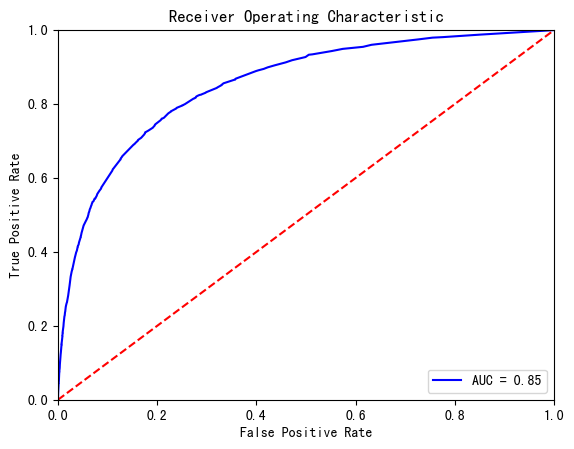

In [729]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print('AUC分数：', roc_auc)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

通常AUC和投产的关系如下：
<ul>
	<li>AUC&gt;0.63：模型对y有区分度（不可投产）</li>
	<li>AUC&gt;0.68：有效益（不可投产）</li>
	<li>AUC&gt;0.73：模型可投产</li>
</ul>

由ROC曲线可知，模型的AUC达到0.85，整体性能较好，基本可以满足需求。在实际生产工作中，应花费更多的时间和业务人员调整AUC曲线以达到最优模型。

In [730]:
#查看模型系数
model.coef_

array([[0.68056389, 0.52225767, 0.65002843, 0.64861883, 0.49774068]])

<p><span style="font-size:20px">八、评分卡转换</span></p>

逻辑回归模型得到的是用户违约的概率，现需要将其通过评分卡转换为用户评分，转换方法是将逻辑回归模型的线性部分抽出，并作一定的线性缩放。转换步骤如下。

1. 令odds=$\frac{P}{1-P}$，它是坏用户的概率与好用户的概率的比值。根据逻辑回归原理，$P=\frac{1}{1+e^{-(wx+b)}}$，变化可得，$ln(\frac{P}{1-P})=wx+b$，或$ln(odds)=wx+b$


2. 评分卡背后的逻辑是odds的变动与评分变动的映射，设计公式如下：

$$Score=A-B*ln(odds)$$

其中A与B是常数，B前面取符号是为了满足“违约概率越低，得分越高”，即“高分高信用低风险”。


3. 定义两个假设:

    a. 基准分。当odds为初始值$θ_0$时的分数$P_0$。通常业界的风控策略基准分设置在600左右，其公式为：
    
    $$P_0=A-B*ln(θ_0)$$
    
    b. PDO(point of double)。即比率翻番时分数的变动值。例如假设当odds翻倍时，分值减少20，则PDO=30
    
    
4. 根据$θ_0$，$P_0$和PDO计算A和B：

    a. 首先根据PDO的定义可知：
    
    $$P_0-PDO=A-B*ln(2θ_0)$$
    
    b. 和3a联立可解得：
    
    $$A=P_0+B*ln(θ_0)$$
    
    $$B=\frac{PDO}{ln2}$$
    

5. 将A，B的值代入1和2，把分箱映射为分数：

$$Score=A-B\{b+w_1x_1+...+w_nx_n\}$$


其中b是逻辑回归模型的截距，w是逻辑回归模型的参数，变量x是出现在最终模型的入模变量，且所有的入模变量都进行了WOE编码。将上式进一步转化可得：


$$Score=A-B*b-B\{w_1x_1+...+w_nx_n\}$$


其中$A-B*b$又称为基础分BaseScore，$-B*w_nx_n$为每个特征每个分箱的特征分FeatureScore。在计算用户得分时，只需算得用户各个特征所属分组，然后在表中查得特征得分，再加上基础分，就是用户的总评分。

In [731]:
#提取模型系数w与阈值b
w = model.coef_[0]                                  # 模型系数(对应归一化数据)
b = model.intercept_[0]                             # 模型阈值(对应归一化数据)
# w = w_norm/(xmax-xmin)                                 # 模型系数(对应原始数据)
# b = b_norm -  (w_norm/(xmax - xmin)).dot(xmin) 
print("w: ",w)
print("b: ",b)

w:  [0.68056389 0.52225767 0.65002843 0.64861883 0.49774068]
b:  0.02552065319436435


In [732]:
#将权重存入字典
weights={}
for i,name in enumerate(useful):
    weights[name]=w[i]
weights

{'RevolvingUtilizationOfUnsecuredLines': 0.68056388546028,
 'age': 0.5222576735295476,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.6500284284754693,
 'NumberOfTimes90DaysLate': 0.64861883060314,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.4977406834004516}

In [733]:
#将逻辑回归模型转为分数表形式输出模型
#令θ0=50,PDO=20,P0=600
theta0=50
PDO=20
P0=600
B=PDO/(math.log(2))
A=P0+B*math.log(theta0)
print("A: ",A)
print("B: ",B)

A:  712.8771237954945
B:  28.85390081777927


In [734]:
#计算基础分
base_score=A-B*b
base_score

712.1407533994194

In [735]:
#计算特征分
#首先建立存储表
df_bin_to_woe=pd.DataFrame(columns=['features','bins','woe'])
for f in useful: 
    temp=woe_iv_tables[f].copy(deep=True)
    temp.reset_index(inplace=True)
    temp=temp[['bins','woe']]
    temp['features']=f
    temp=temp[['features','bins','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,temp])
    
df_bin_to_woe

,features,bins,woe
0,RevolvingUtilizationOfUnsecuredLines,"[0.0, 0.115)",-1.342155
1,RevolvingUtilizationOfUnsecuredLines,"[0.115, 0.218)",-0.833253
2,RevolvingUtilizationOfUnsecuredLines,"[0.218, 0.495)",-0.276550
3,RevolvingUtilizationOfUnsecuredLines,"[0.495, 0.698)",0.390814
4,RevolvingUtilizationOfUnsecuredLines,"[0.698, 0.86)",0.834870
5,RevolvingUtilizationOfUnsecuredLines,"[0.86, 50708.1)",1.366286
0,age,"[21.0, 35.5)",0.547370
1,age,"[35.5, 42.5)",0.352576
2,age,"[42.5, 53.5)",0.180807
3,age,"[53.5, 56.5)",-0.057629


In [736]:
def generate_scorecard(model_coef, binning_df, features, B):
    lst=[]
    cols=['Features','Bins','WOE','Score']
    coef=model_coef[0]
    for i in range(len(features)):
        f=features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bins'],row['woe'], int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data


In [737]:
#获取特征分表
score_card=generate_scorecard(model.coef_, df_bin_to_woe, useful, B)
score_card

,Features,Bins,WOE,Score
0,RevolvingUtilizationOfUnsecuredLines,"[0.0, 0.115)",-1.342155,26
1,RevolvingUtilizationOfUnsecuredLines,"[0.115, 0.218)",-0.833253,16
2,RevolvingUtilizationOfUnsecuredLines,"[0.218, 0.495)",-0.276550,5
3,RevolvingUtilizationOfUnsecuredLines,"[0.495, 0.698)",0.390814,-8
4,RevolvingUtilizationOfUnsecuredLines,"[0.698, 0.86)",0.834870,-16
5,RevolvingUtilizationOfUnsecuredLines,"[0.86, 50708.1)",1.366286,-27
6,age,"[21.0, 35.5)",0.547370,-8
7,age,"[35.5, 42.5)",0.352576,-5
8,age,"[42.5, 53.5)",0.180807,-3
9,age,"[53.5, 56.5)",-0.057629,1


In [738]:
#模型输出：基础分，特征分表，特征名称
useful2=[]
for i in useful:
    i=i+"_woe"
    useful2.append(i)
print(useful2)
md={
    'feature_score': score_card,
    'base_score': base_score,
    'model_feature': useful
}

['RevolvingUtilizationOfUnsecuredLines_woe', 'age_woe', 'NumberOfTime30-59DaysPastDueNotWorse_woe', 'NumberOfTimes90DaysLate_woe', 'NumberOfTime60-89DaysPastDueNotWorse_woe']


In [769]:
#保存评分卡
with pd.ExcelWriter('scorecard.xlsx') as writer:
    temp=score_card.copy(deep=True)
    temp=temp.append({'Features':'Base Score','Bins': 'NA', 'WOE':'NA', 'Score':base_score},ignore_index=True)
    temp.to_excel(writer,sheet_name = "scorecard")

<p><span style="font-size:20px">九、评分阈值表</span></p>

在上一节生成了评分卡，通过评分卡就可以对新进的用户进行评分，从而评估是否发放贷款。在模型投产时，需要设定评分阈值，将低于评分阈值的用户拒绝。评分阈值的设定需要借助评分阈值表，并结合业务而设定。

阈值表由建模样本的评分统计得到，它展示了不同评分阈值给业务带来的效果。阈值表的统计需要先计算出各个样本的评分，再对评分按分段分组，统计每个分段的统计信息。

In [739]:
#通过模型计算分数
def cal_score(md,X):
    #提取模型数据
    score_tb=md['feature_score']
    base_score=md['base_score']
    features=md['model_feature']
    #将分数表转换为字典形式
    score_dict={feature:{} for feature in features}
    for i in range(score_tb.shape[0]):
        feature=score_tb.loc[i,'Features']
        woe=score_tb.loc[i,'WOE']
        score_dict[feature][woe]=score_tb.loc[i,'Score']
    #将特征按WOE转换为分数
    score=X[features].copy()
    for col in features:
        score[col]=score[col].map(score_dict[col])
        
    #计算总得分
    score['base_score']=base_score
    score['score']=score.sum(axis=1)
    return score

In [759]:
#计算所有样本分数
model_X=X_train.copy(deep=True)
model_X.rename(columns=lambda x: x.split('_')[0],inplace=True)
pred_rs=cal_score(md, model_X)
pred_rs['is_bad']=y_train.copy(deep=True)

In [760]:
#计算分数阈值表并查看分数分布函数
def cal_score_threshold_tb(score_df,bin_step=10,is_bad_col_name='is_bad',score_col_name='score'):
    # -----计算分组起始结束字段--------------
    bin_start = math.trunc(score_df[score_col_name].min()/bin_step)*bin_step
    bin_end   =  math.trunc(score_df[score_col_name].max()/bin_step+1)*bin_step
    score_thd = pd.DataFrame(columns=['分组名称','本组客户','本组好客户','本组坏客户'])
    #-----统计分组内的好坏客户个数-------
    for cur_bin in range(bin_start,bin_end,bin_step):
        cur_bin_name='['+str(cur_bin)+'-'+str(cur_bin+bin_step)+')'
        cur_score_df = score_df[(score_df[score_col_name]>=cur_bin)&(score_df[score_col_name]<cur_bin+bin_step)][is_bad_col_name]
        bad_cn = cur_score_df.sum()
        cn = cur_score_df.shape[0]
        score_thd.loc[score_thd.shape[0]]=[cur_bin_name,cn,cn-bad_cn,bad_cn]
    #------计算阈值表其它字段-------------------    
    score_thd['总客户']      = score_thd['本组客户'].sum()
    score_thd['总好客户']    = score_thd['本组好客户'].sum()
    score_thd['总坏客户']    = score_thd['本组坏客户'].sum()
    score_thd['阈值']        = score_thd['分组名称'].apply(lambda x: '<'+x.split('-')[1].replace(')',''))  
    score_thd['损失客户']    = score_thd['本组客户'].cumsum()
    score_thd['损失客户%']   = score_thd['损失客户']/score_thd['总客户']
    score_thd['损失好客户']  = score_thd['本组好客户'].cumsum()
    score_thd['损失好客户%'] = score_thd['损失好客户']/score_thd['总好客户']
    score_thd['剔除坏客户']  = score_thd['本组坏客户'].cumsum()
    score_thd['剔除坏客户%'] = score_thd['剔除坏客户']/score_thd['总坏客户']
    score_thd['本组坏客户占比']       = score_thd['本组坏客户']/score_thd['本组客户']
    score_thd['损失客户中坏客户占比'] = score_thd['剔除坏客户']/score_thd['损失客户']
    return score_thd

In [761]:
# 计算分数阈值表
score_df = pred_rs[['score','is_bad']]
score_thd=cal_score_threshold_tb(score_df,bin_step=10)

In [762]:
score_thd

,分组名称,本组客户,本组好客户,本组坏客户,总客户,总好客户,总坏客户,阈值,损失客户,损失客户%,损失好客户,损失好客户%,剔除坏客户,剔除坏客户%,本组坏客户占比,损失客户中坏客户占比
0,[520-530),1,0,1,194864,97432,97432,<530,1,0.000005,0,0.000000,1,0.000010,1.000000,1.000000
1,[530-540),23,0,23,194864,97432,97432,<540,24,0.000123,0,0.000000,24,0.000246,1.000000,1.000000
2,[540-550),274,2,272,194864,97432,97432,<550,298,0.001529,2,0.000021,296,0.003038,0.992701,0.993289
3,[550-560),805,19,786,194864,97432,97432,<560,1103,0.005660,21,0.000216,1082,0.011105,0.976398,0.980961
4,[560-570),1584,52,1532,194864,97432,97432,<570,2687,0.013789,73,0.000749,2614,0.026829,0.967172,0.972832
5,[570-580),1400,66,1334,194864,97432,97432,<580,4087,0.020974,139,0.001427,3948,0.040521,0.952857,0.965990
6,[580-590),2489,131,2358,194864,97432,97432,<590,6576,0.033747,270,0.002771,6306,0.064722,0.947368,0.958942
7,[590-600),2257,108,2149,194864,97432,97432,<600,8833,0.045329,378,0.003880,8455,0.086778,0.952149,0.957206
8,[600-610),3161,165,2996,194864,97432,97432,<610,11994,0.061551,543,0.005573,11451,0.117528,0.947801,0.954727
9,[610-620),4758,260,4498,194864,97432,97432,<620,16752,0.085968,803,0.008242,15949,0.163694,0.945355,0.952065


以阈值表的第一行为例，可以这样理解：如果以530分为阈值，将有1个用户被拒绝，这个用户是坏用户。阈值表的每个字段都是为了评估以xxx分为阈值时，所带来的损失（筛掉的好用户）和收益（筛掉的坏用户）。需要结合业务找到效益均衡点，并且不能损失用户过多，才能确定最终的评分阈值。

In [770]:
#保存分数阈值表
with pd.ExcelWriter('threshold.xlsx') as writer:
    score_thd.to_excel(writer,sheet_name = "threshold")

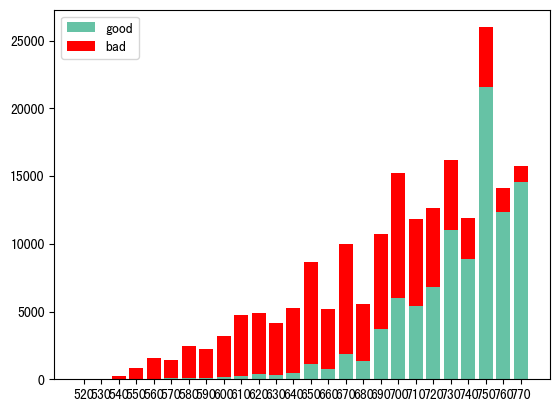

In [763]:
# 画出分数分布
x_axis = score_thd['分组名称'].apply(lambda x: x.split('-')[0].replace('[',''))  
plt.bar(x_axis, score_thd['本组好客户'], align="center", color="#66c2a5",label="good")
plt.bar(x_axis, score_thd['本组坏客户'], align="center", bottom=score_thd['本组好客户'], color='r', label="bad")
plt.rcParams["figure.figsize"] = (9, 4) # 设置figure_size尺寸
plt.legend()
plt.show()

<p><span style="font-size:20px">十、总结</span></p>

本文基于kaggle上的用户信用数据构建逻辑回归模型，并转化为评分卡，进行用户是否有违约可能性的预测。模型最终保留的评分特征有RevolvingUtilizationOfUnsecuredLines、age、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse这五项，模型的测试AUC达到0.85，具有较好的性能。

最终模型概率表达式如下：

$$P=\frac{1}{1+e^{-[0.68056389*RevolvingUtilizationOfUnsecuredLines_{woe}+0.52225767*age_{woe}+0.65002843*NumberOfTime30-59DaysPastDueNotWorse_{woe}+0.64861883*NumberOfTimes90DaysLate_{woe}+0.49774068*NumberOfTime60-89DaysPastDueNotWorse_{woe}+0.02552065319436435
]}}$$

分数表达式如下：

$$Score=712.8771237954945
-28.85390081777927*[0.68056389*RevolvingUtilizationOfUnsecuredLines_{woe}+0.52225767*age_{woe}+0.65002843*NumberOfTime30-59DaysPastDueNotWorse_{woe}+0.64861883*NumberOfTimes90DaysLate_{woe}+0.49774068*NumberOfTime60-89DaysPastDueNotWorse_{woe}+0.02552065319436435
]$$